# Notes

# Load Modules

In [1]:
import numpy as np
import pandas as pd

import anndata as adata
import scanpy as sc
import squidpy as sq
from SpaceFlow import SpaceFlow

# Load Data

In [ ]:
exp_df = pd.read_csv("simulated_expression.csv", index_col=0)
exp_df.head()

,cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9,cell10,...,cell491,cell492,cell493,cell494,cell495,cell496,cell497,cell498,cell499,cell500
Burn1_TF1,8,9,8,6,6,10,3,14,7,2,...,6,9,13,8,11,6,10,12,2,3
Burn1_TF2,13,17,3,11,9,11,3,14,7,4,...,8,8,20,9,12,9,13,5,6,8
Burn1_TF3,17,9,15,11,11,16,14,16,10,6,...,9,15,21,13,21,16,16,16,11,12
Burn2_TF1,16,10,10,18,16,14,10,17,20,13,...,12,18,23,17,15,12,19,25,15,17
Burn3_TF1,15,11,9,4,21,12,5,11,7,5,...,4,7,6,14,10,10,9,15,5,5


In [ ]:
meta_info_df = pd.read_csv("simulated_meta.csv", index_col=0)
meta_info_df.head()

In [6]:
ad = adata.AnnData(exp_df.T)

In [7]:
ad.X

array([[ 8, 13, 17, ...,  0,  0,  0],
       [ 9, 17,  9, ..., 10, 22,  7],
       [ 8,  3, 15, ...,  0,  0,  0],
       ...,
       [12,  5, 16, ..., 15, 21, 10],
       [ 2,  6, 11, ...,  0,  0,  0],
       [ 3,  8, 12, ...,  0,  0,  0]])

In [8]:
ad.obs_names

Index(['cell1', 'cell2', 'cell3', 'cell4', 'cell5', 'cell6', 'cell7', 'cell8',
       'cell9', 'cell10',
       ...
       'cell491', 'cell492', 'cell493', 'cell494', 'cell495', 'cell496',
       'cell497', 'cell498', 'cell499', 'cell500'],
      dtype='object', length=500)

In [9]:
ad.var_names

Index(['Burn1_TF1', 'Burn1_TF2', 'Burn1_TF3', 'Burn2_TF1', 'Burn3_TF1',
       'Burn3_TF2', 'Burn4_TF1', 'Burn5_TF1', 'A1_TF1', 'A1_TF2', 'A2_TF1',
       'A3_TF1', 'A3_TF2', 'A4_TF1', 'A4_TF2', 'B1_TF1', 'B1_TF2', 'B2_TF1',
       'B3_TF1', 'B3_TF2', 'B4_TF1', 'B4_TF2', 'B5_TF1', 'B6_TF1', 'C1_TF1',
       'C1_TF2', 'C2_TF1', 'C3_TF1', 'C4_TF1', 'C4_TF2', 'C5_TF1', 'C6_TF1',
       'C6_TF2', 'C7_TF1', 'C7_TF2', 'C8_TF1', 'C8_TF2', 'C8_TF3', 'C9_TF1',
       'C9_TF2', 'C10_TF1', 'C10_TF2', 'C11_TF1', 'C12_TF1', 'C12_TF2',
       'C13_TF1', 'C14_TF1', 'C14_TF2', 'D1_TF1', 'D2_TF1', 'D3_TF1', 'D4_TF1',
       'D4_TF2', 'D5_TF1', 'D5_TF2', 'D6_TF1', 'D7_TF1', 'D7_TF2', 'D8_TF1',
       'D9_TF1', 'D9_TF2', 'D10_TF1', 'D11_TF1', 'D11_TF2', 'D12_TF1',
       'D12_TF2', 'D12_TF3', 'D13_TF1', 'D13_TF2', 'D14_TF1', 'D14_TF2',
       'E1_TF1', 'E2_TF1', 'E3_TF1', 'E3_TF2', 'E3_TF3', 'E4_TF1', 'E5_TF1',
       'F1_TF1', 'F2_TF1', 'F2_TF2', 'F3_TF1', 'F3_TF2', 'F3_TF3', 'F4_TF1',
       'F4_TF2', 

In [10]:
ad.obs = ad.obs.join(meta_info_df)
ad.obs.head()

,x,y,Niche_NTScore,Cell_NTScore,Ground_Truth,Cell_Type,Lineage
cell1,0.815010,0.392859,0.798545,0.782942,0.815010,I,3
cell2,0.007832,0.528165,0.000631,0.004472,0.007832,A,1
cell3,0.238570,0.280569,0.023396,0.066722,0.238570,I,3
cell4,0.954609,0.950353,0.794808,0.778961,0.954609,G,2
cell5,0.008684,0.046309,0.000522,0.001262,0.008684,A,1


In [11]:
ad.obsm['spatial'] = ad.obs[['x', 'y']].values

# SpaceFlow

In [12]:
sf = SpaceFlow.SpaceFlow(adata=ad)

In [13]:
sf.preprocessing_data(n_top_genes=3000)

In [14]:
sf.train(spatial_regularization_strength=0.1, z_dim=50, lr=1e-3, epochs=1000, max_patience=50, min_stop=100, random_seed=42, gpu=0, regularization_acceleration=True, edge_subset_sz=1000000)

Epoch 2/1000, Loss: 3.9054417610168457
Epoch 12/1000, Loss: 1.6026474237442017
Epoch 22/1000, Loss: 1.6016392707824707
Epoch 32/1000, Loss: 1.4557181596755981
Epoch 42/1000, Loss: 1.4519097805023193
Epoch 52/1000, Loss: 1.4481666088104248
Epoch 62/1000, Loss: 1.4187270402908325
Epoch 72/1000, Loss: 1.414929747581482
Epoch 82/1000, Loss: 1.4194691181182861
Epoch 92/1000, Loss: 1.4069687128067017
Epoch 102/1000, Loss: 1.413097858428955
Epoch 112/1000, Loss: 1.3886646032333374
Epoch 122/1000, Loss: 1.3791368007659912
Epoch 132/1000, Loss: 1.3672642707824707
Epoch 142/1000, Loss: 1.3771440982818604
Epoch 152/1000, Loss: 1.3863774538040161
Epoch 162/1000, Loss: 1.3896353244781494
Epoch 172/1000, Loss: 1.348447561264038
Epoch 182/1000, Loss: 1.3873546123504639
Epoch 192/1000, Loss: 1.3205795288085938
Epoch 202/1000, Loss: 1.3274154663085938
Epoch 212/1000, Loss: 1.3151946067810059
Epoch 222/1000, Loss: 1.3377841711044312
Epoch 232/1000, Loss: 1.3041608333587646
Epoch 242/1000, Loss: 1.330179

array([[ 0.34986323, -0.24351384, -0.6902782 , ..., -0.23019956,
         1.0757923 , -0.161731  ],
       [ 0.16188778, -0.49578795, -0.7539856 , ..., -0.2356087 ,
         0.880125  , -0.2326426 ],
       [ 0.8954601 , -0.2732957 , -0.7082335 , ..., -0.24510387,
        -0.07976995, -0.03531196],
       ...,
       [ 0.02435183, -0.3771518 , -0.50410885, ..., -0.06388409,
         0.08376963, -0.06574274],
       [ 1.213813  , -0.21719134, -0.76111424, ..., -0.20374519,
         0.5390928 , -0.18590255],
       [ 0.7937186 , -0.3108988 , -0.85200554, ..., -0.14980187,
         0.40866855, -0.23357894]], dtype=float32)

In [15]:
sf.segmentation(domain_label_save_filepath="./domains.tsv", n_neighbors=50, resolution=1.0)

Performing domain segmentation


/sc/arion/work/wangw32/conda-env/envs/spaceflow/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/sc/arion/work/wangw32/conda-env/envs/spaceflow/lib/python3.9/site-packages/SpaceFlow/SpaceFlow.py:306: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(embedding_adata, resolution=float(resolution))


Segmentation complete, domain labels of cells or spots saved at ./domains.tsv !


No segmentation data found, please ensure you have run the segmentation() method.


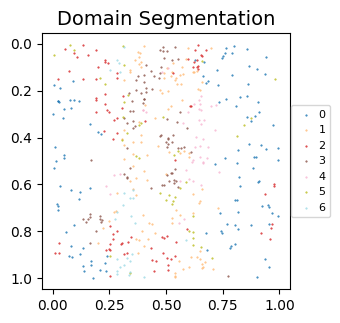

In [16]:
sf.plot_segmentation(segmentation_figure_save_filepath="./domain_segmentation.pdf", colormap="tab20", scatter_sz=1., rsz=4., csz=4., wspace=.4, hspace=.5, left=0.125, right=0.9, bottom=0.1, top=0.9)

In [17]:
sf.pseudo_Spatiotemporal_Map(pSM_values_save_filepath="./pSM_values.tsv", n_neighbors=20, resolution=1.0)

Performing pseudo-Spatiotemporal Map
pseudo-Spatiotemporal Map(pSM) calculation complete, pSM values of cells or spots saved at ./pSM_values.tsv!


In [18]:
sf.plot_pSM(pSM_figure_save_filepath="./pseudo-Spatiotemporal-Map.pdf", colormap="roma", scatter_sz=1., rsz=4., csz=4., wspace=.4, hspace=.5, left=0.125, right=0.9, bottom=0.1, top=0.9)

Plotting complete, pseudo-Spatiotemporal Map figure saved at ./pseudo-Spatiotemporal-Map.pdf !


In [19]:
import session_info